# 数据检查

In [17]:
import pandas as pd
import numpy as np

In [18]:
df = pd.read_csv('IrisFishData.csv')
df.head()

,sepal_lenth_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,4.3,3.0,1.1,0.1,setosa
1,4.4,2.9,1.4,0.2,setosa
2,4.4,3.0,1.3,0.2,setosa
3,4.4,3.2,1.3,0.2,setossa
4,4.5,2.3,1.3,0.3,setosa


In [19]:
df.describe()

,sepal_lenth_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
df.isnull().values.any()

False

In [45]:
df = pd.read_csv('IrisFishData.csv', na_values=['NA'])

df.isnull().sum()

In [22]:
%matplotlib inline

import matplotlib.pyplot as plt

In [23]:
import seaborn as sb

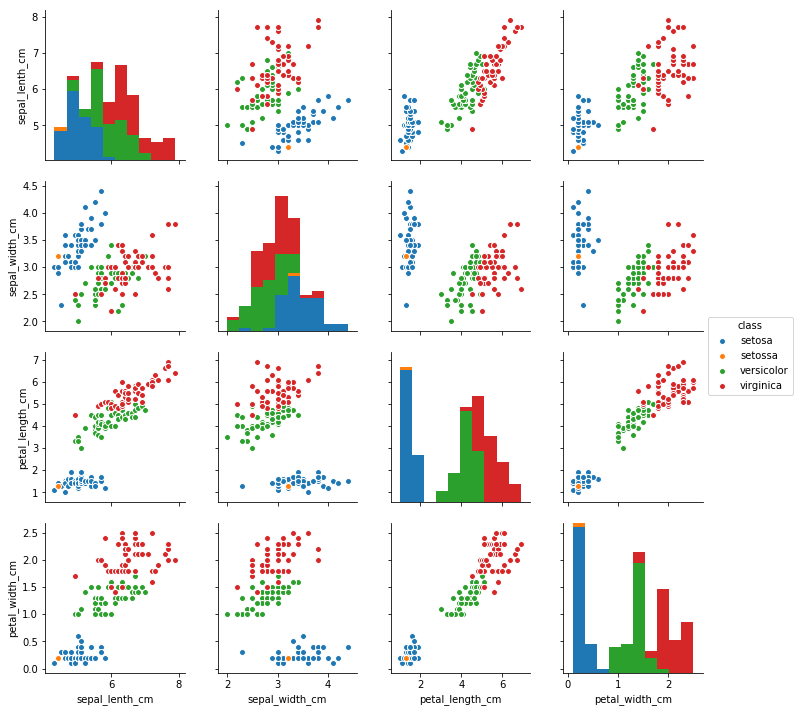

In [24]:
sb.pairplot(df.dropna(), hue = 'class')
#每列的分布在对角线上画出

# 数据清洗

In [26]:
df['class'].unique()

array(['setosa', 'setossa', 'versicolor', 'virginica'], dtype=object)

In [46]:
df.loc[df['class'] == 'setossa', 'class'] = 'setosa'
df['class'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## 由图可知蓝色有个点总是在范围外 是不是可能有数据错误

In [55]:
df.loc[df['class'] == 'setosa', 'sepal_width_cm'].describe()

count    50.000000
mean      3.428000
std       0.379064
min       2.300000
25%       3.200000
50%       3.400000
75%       3.675000
max       4.400000
Name: sepal_width_cm, dtype: float64

In [76]:
df = df.loc[(df['class'] != 'setosa') | ((df['class'] == 'setosa') & (df['sepal_width_cm'] >= 2.5))]
#不是setosa的class的 不需要清洗      是setosa的数据需要过滤到sepal_width_cm 值为2.5以上的 

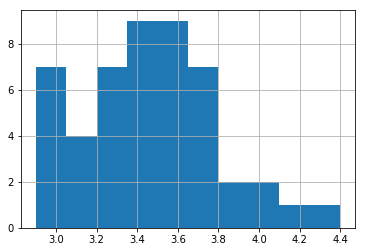

In [75]:
sub_df = df.loc[(df['class'] != 'setosa') | (df['sepal_width_cm'] >= 2.5)]
sub_df.loc[sub_df['class'] == 'setosa', 'sepal_width_cm'].hist()

In [77]:
df.to_csv('Iris_clean.csv', index=False)

In [78]:
clean_df = pd.read_csv('Iris_clean.csv')

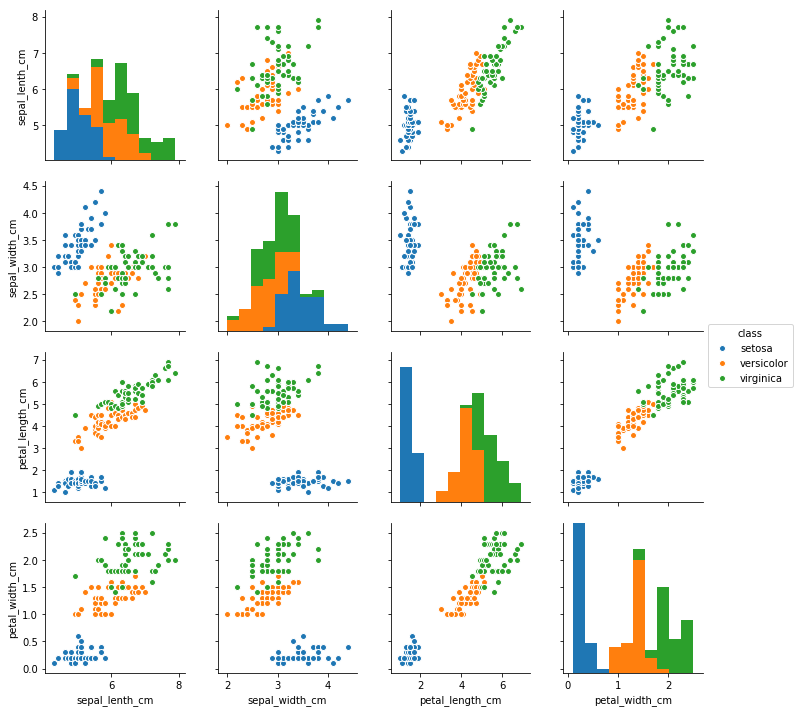

In [79]:
sb.pairplot(clean_df, hue='class')